In [28]:
import networkx as nx
import numpy as np
import math
import collections
import matplotlib.pyplot as plt
import pandas as pd

G2 = nx.read_gpickle("<graph_pickle_file>")

In [29]:
from networkx.algorithms import community

graphs = list(nx.connected_component_subgraphs(G2))

numbers = np.array([])
for c in graphs:
    n = c.number_of_nodes()
    if n == 1608:
        biggest = c
        break
        
part = community.greedy_modularity_communities(biggest)
all_partitions = part

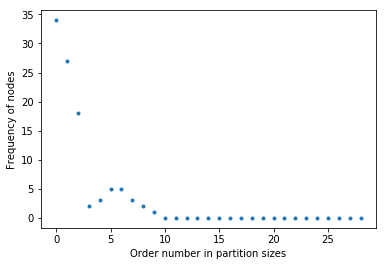

In [30]:
comments_file = "<comments_dataframe>"
comments = pd.read_pickle(comments_file)

posts_file = "<posts_dataframe>"
posts = pd.read_pickle(posts_file)

users_file = "<users_dataframe>"
users = pd.read_pickle(users_file)

users_reputations = {}

for node in biggest.nodes():
    user = users.loc[users['Id'] == node]
    if not user.empty:
        reputation = int(user.iloc[0]['Reputation'])
        users_reputations[str(user.iloc[0]['Id'])] = reputation

sorted_by_value = sorted(users_reputations.items(), key=lambda kv: kv[1], reverse=True)
values = list(map(lambda x: str(x[0]), sorted_by_value[0:100]))


i = 1
partitiot_frekvenssit = []
for partition in part:
    kaikki = 0
    i += 1
    for iid in values:
        if str(iid) in partition:
            kaikki += 1
    partitiot_frekvenssit.append(kaikki)
            
plt.plot(partitiot_frekvenssit, ".")
plt.xlabel("Order number in partition sizes")
plt.ylabel("Frequency of nodes")
plt.show()

In [31]:
partitions_posts = []
for partition in part:
    p = []
    for user in partition:
        user_posts = posts.loc[posts['OwnerUserId'] == user]
        user_posts = user_posts[user_posts['CreationDate'].str.match('2015-10')]
        body = user_posts['Body']
        for b in list(body):
            p.append(b)
    partitions_posts.append(p)

In [32]:
partition_matrix = []
lengths = []
average_texts = []

# Topic frequencies are written to csv file
f = open("table2.csv", "w+")
print(len(all_partitions))

index = 0
for partition in partitions_posts:
    uusi = []
    avlen = 0
    item_dict = {'C++':0, 'Java':0, 'NPM':0, 'SQL':0, 'JSON':0, 'PHP':0, 'Python':0, 'CSS':0, 'Javascript': 0, 'C#':0}
    for item in partition:
        avlen = avlen + len(item)
        for key, value in item_dict.items():
            item_dict[key] = item_dict[key] + item.lower().count(key.lower())
    avlen = avlen / len(partition)
    for key, value in item_dict.items():
        uusi.append(value)
    lengths.append(len(all_partitions[index]))
    average_texts.append(avlen)
    if len(partition) >= 100:
        partition_matrix.append(uusi)
        f.write(str(len(all_partitions[index])) + ",")
        f.write(",".join(str(x) for x in item_dict.values()) + "\n")
    index += 1
    
f.close()

29


In [33]:
from scipy.stats import chi2_contingency
partition_matrix = np.array(partition_matrix)

p = chi2_contingency(partition_matrix)
print(p)

(4627.2543507511837, 0.0, 63, array([[  62.9686816 ,  697.04866139,   37.58595723,  600.39905708,
         240.15962283,  678.98787675,   91.28018185,  342.66677892,
         103.48341472,   44.41976764],
       [  14.18370096,  157.01027109,    8.46624011,  135.23993938,
          54.09597575,  152.94207779,   20.56086883,   77.1857215 ,
          23.30964809,   10.00555649],
       [  28.04158949,  310.41387439,   16.73800303,  267.37329517,
         106.94931807,  302.37093787,   40.64943593,  152.59841724,
          46.0838525 ,   19.78127631],
       [   4.17039906,   46.1653477 ,    2.48930796,   39.76427008,
          15.90570803,   44.96918673,    6.0454622 ,   22.69472975,
           6.85367907,    2.94190941],
       [   6.29904024,   69.72891059,    3.75989224,   60.06061627,
          24.02424651,   67.92220913,    9.13116686,   34.27849806,
          10.3519111 ,    4.44350901],
       [   5.64741539,   62.51557501,    3.37093787,   53.84744907,
          21.53897963,   60